In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [ ]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)


In [ ]:
# Compile and train
model.compile(
  loss="sparse_categorical_crossentropy",
  optimizer="adam",
  metrics=["accuracy"]
)

r = model.fit(
  x_train,
  y_train,
  validation_data=(x_test, y_test),
  epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.5642 - accuracy: 0.7915 - val_loss: 0.4499 - val_accuracy: 0.8346
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3986 - accuracy: 0.8526 - val_loss: 0.3972 - val_accuracy: 0.8517
Epoch 3/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3508 - accuracy: 0.8703 - val_loss: 0.3920 - val_accuracy: 0.8529
Epoch 4/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3195 - accuracy: 0.8812 - val_loss: 0.3513 - val_accuracy: 0.8735
Epoch 5/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3010 - accuracy: 0.8879 - val_loss: 0.3134 - val_accuracy: 0.8853
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2828 - accuracy: 0.8942 - val_loss: 0.3197 - val_accuracy: 0.8816
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2702 - accuracy: 0.8993 - val_loss: 0.3073 -

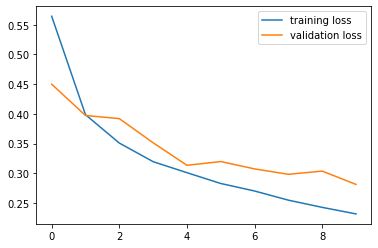

In [ ]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="training loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()
# plt.show()

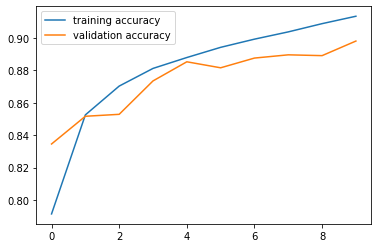

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history["accuracy"], label="training accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()
# plt.show()

Confusion matrix without normalisation
[[859   1   8  32   2   1  91   0   6   0]
 [  2 982   1  11   1   0   1   0   2   0]
 [ 20   0 834  14  68   0  64   0   0   0]
 [ 18   4   6 918  29   1  20   0   4   0]
 [  1   0  75  37 819   0  67   0   1   0]
 [  0   0   0   1   0 966   0  23   2   8]
 [128   2  67  34  60   1 703   0   5   0]
 [  0   0   0   0   0  12   0 974   0  14]
 [  3   0   3   6   3   3   2   3 977   0]
 [  0   0   0   0   0   6   0  44   1 949]]


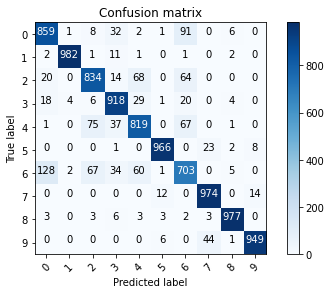

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(
  cm, classes, normalise=False, title="Confusion matrix",
  cmap=plt.cm.Blues
  ):
  """
  This function prints and plots the confusion matrix.
  Normalisation can be applied by setting 'normalise=True'.
  """
  if normalise:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix without normalisation")
  
  print(cm)

  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalise else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));